# 여름 의류 판매 분석

데이터 : https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish
- [summer-products-with-rating-and-performance_2020-08.csv] - 여름 상품 관련 데이터 사용

## 0. 분석 프로세스
1. 데이터 EDA 및 전처리
2. 클러스터링 - 상품 군집화 / 상관관계 분석
3. 판매량 예측

### 1. 데이터 EDA 및 전처리


#### 0) 데이터 불러오기

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'colab'
pio.renderers

import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML_Practice/08_Sales_summer_clothing_ml/summer-products-with-rating-and-performance_2020-08.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


![데이터 정보](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1488294%2F308810459ae5232399672ba3eef228ef%2Fannotated-search-results-wish-website.jpg?generation=1598785563117062&alt=media)
- units_sold : 판매량
- rating : 평점
- retail_price : 상품 소매 가격(할인 전 가격)
- price : 상품 가격

In [3]:
df.shape

(1573, 43)

#### 1) 데이터 컬럼 타입 확인

In [4]:
# 컬럼 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
# 데이터 타입별 컬럼 수 확인하기
dtype_data = df.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64     15
1     float64      9
2      object     19


#### 2) 통계값 확인

In [6]:
# 통계값 확인
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1528.0,1528.0,1528.0,1528.0,...,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,473.0,1573.0,1573.0,1573.0
mean,8.0,23.0,4339.0,0.0,4.0,890.0,442.0,180.0,135.0,64.0,...,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26496.0,4.0,0.0
std,4.0,30.0,9357.0,0.0,1.0,1984.0,980.0,401.0,312.0,151.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,78474.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,24.0,12.0,5.0,4.0,2.0,...,0.0,6.0,2.0,0.0,31.0,50.0,1.0,1987.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,150.0,79.0,32.0,24.0,11.0,...,0.0,50.0,2.0,0.0,40.0,50.0,1.0,7936.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,855.0,414.0,168.0,129.0,62.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


#### 3) 결측값 확인

In [7]:
# 결측값 확인
df.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [8]:
# 결측치 시각화 함수 정의
def missing_data(df):
  missing_col = df.columns[df.isna().sum() > 0]
  missing_value = (df[missing_col].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
  plt.figure(figsize=(10,6))
  sns.barplot(x=missing_value.values, y=missing_value.index)
  plt.title('Missing Value Ratio(%)')
  plt.show()

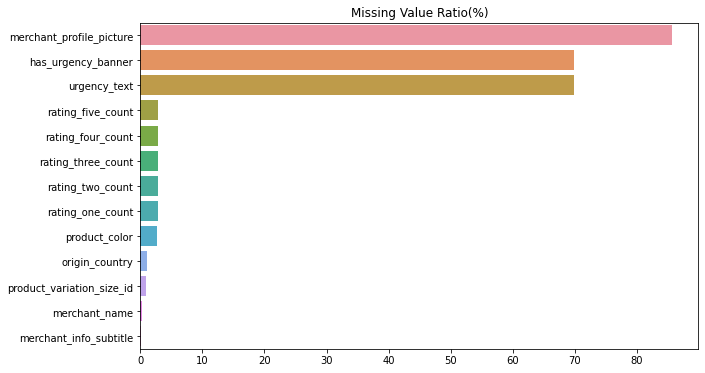

In [9]:
missing_data(df)

#### 4) 중복값 확인


In [10]:
# 중복값 확인
df.duplicated().sum()

34

In [11]:
# keep=False : 중복값의 원본도 표시
df.loc[df.duplicated(keep = False)].sort_values(by=list(df.columns)).head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
557,2019 Mode féminine Hot Summer Fashion Flare Sl...,2019 Women's Fashion Hot Summer Fashion Flare ...,11.0,10,EUR,100,0,3.96,98,46.0,...,5070,4.276726,5ae2d62f2c49564f1df9bbd1,0,NaN,https://www.wish.com/c/5cbdabea787e5828c3059a6c,https://contestimg.wish.com/api/webimage/5cbda...,5cbdabea787e5828c3059a6c,summer,2020-08
1444,2019 Mode féminine Hot Summer Fashion Flare Sl...,2019 Women's Fashion Hot Summer Fashion Flare ...,11.0,10,EUR,100,0,3.96,98,46.0,...,5070,4.276726,5ae2d62f2c49564f1df9bbd1,0,NaN,https://www.wish.com/c/5cbdabea787e5828c3059a6c,https://contestimg.wish.com/api/webimage/5cbda...,5cbdabea787e5828c3059a6c,summer,2020-08
757,"2019 été nouvelle mode féminine ""Let It ~"" Bee...",2019 Summer New Women Fashion “ Let It ~“ Bee ...,11.0,10,EUR,10000,1,4.05,1479,754.0,...,5816,3.936382,58330d7def56284f7634e5e5,0,NaN,https://www.wish.com/c/5cedf93ac0baab7389f4ccd7,https://contestimg.wish.com/api/webimage/5cedf...,5cedf93ac0baab7389f4ccd7,summer,2020-08
1271,"2019 été nouvelle mode féminine ""Let It ~"" Bee...",2019 Summer New Women Fashion “ Let It ~“ Bee ...,11.0,10,EUR,10000,1,4.05,1479,754.0,...,5816,3.936382,58330d7def56284f7634e5e5,0,NaN,https://www.wish.com/c/5cedf93ac0baab7389f4ccd7,https://contestimg.wish.com/api/webimage/5cedf...,5cedf93ac0baab7389f4ccd7,summer,2020-08
789,2020 Shorts classiques pour hommes d'été Panta...,2020 Summer Men's Classic Shorts Multi-pocket ...,7.0,17,EUR,10,0,5.00,2,2.0,...,46,3.608696,5e2ecb9deed5087a7ba2f5f7,0,NaN,https://www.wish.com/c/5eeef4c4066647a9388a8ac2,https://contestimg.wish.com/api/webimage/5eeef...,5eeef4c4066647a9388a8ac2,summer,2020-08


In [12]:
# 중복된 항목 제거
df.drop_duplicates(inplace=True, keep='first', ignore_index = True)

#### 5) 데이터 시각화


In [13]:
# 문자형 데이터 -> countplot : 데이터 개수 확인 
# 숫자형 데이터 -> hist : 데이터 분포 정도 확인

def count_hist(df, col, columns_to_exclude):
  if col not in columns_to_exclude:
    if df[col].dtypes not in ['int64','float64']: # 문자형일 경우
      fig, axes = plt.subplots(1,1,figsize=(20,8))
      sns.countplot(x = col, data=df)
      plt.xticks(rotation=80)
      plt.suptitle(col,fontsize=15)
      plt.show()
      print('---'*40)
      print('')
    else:
      g = sns.FacetGrid(df, margin_titles=True, aspect=4, height=3)  # 숫자형 데이터인 경우
      g.map(plt.hist,col,bins=100)
      plt.suptitle(col,fontsize=15)
      plt.show()
      print('---'*40)
      print('')
    plt.show()

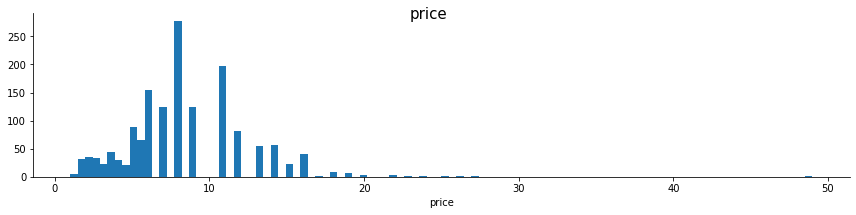

------------------------------------------------------------------------------------------------------------------------



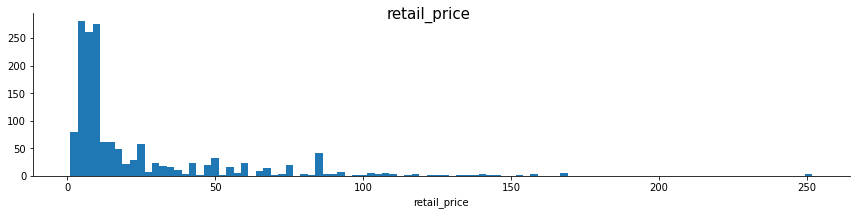

------------------------------------------------------------------------------------------------------------------------



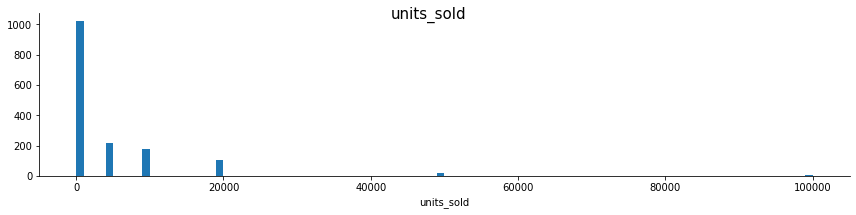

------------------------------------------------------------------------------------------------------------------------



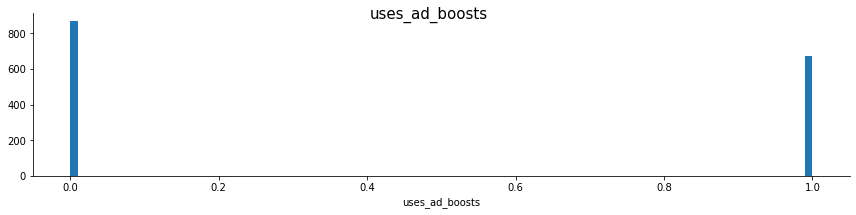

------------------------------------------------------------------------------------------------------------------------



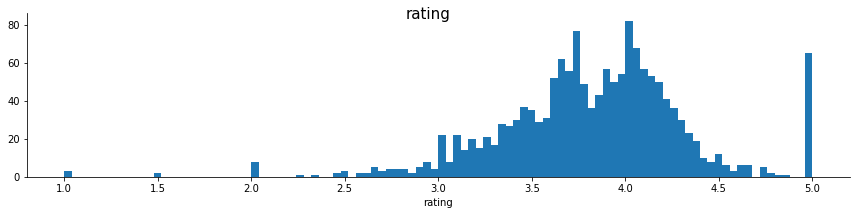

------------------------------------------------------------------------------------------------------------------------



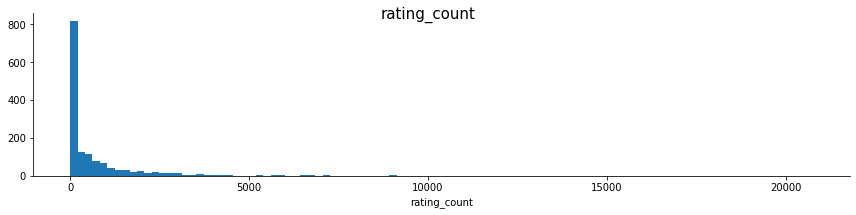

------------------------------------------------------------------------------------------------------------------------



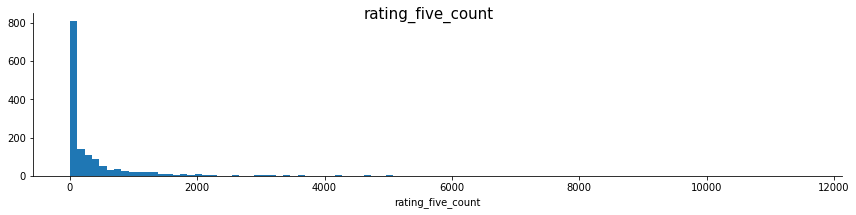

------------------------------------------------------------------------------------------------------------------------



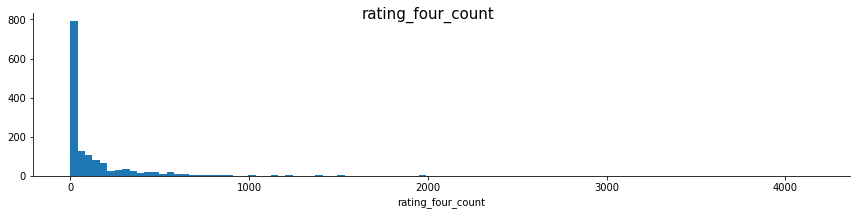

------------------------------------------------------------------------------------------------------------------------



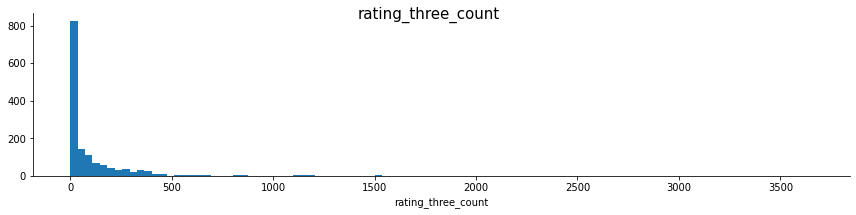

------------------------------------------------------------------------------------------------------------------------



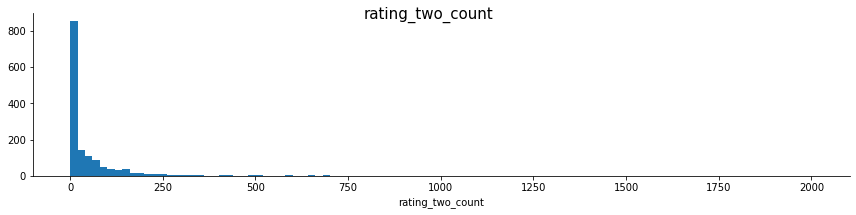

------------------------------------------------------------------------------------------------------------------------



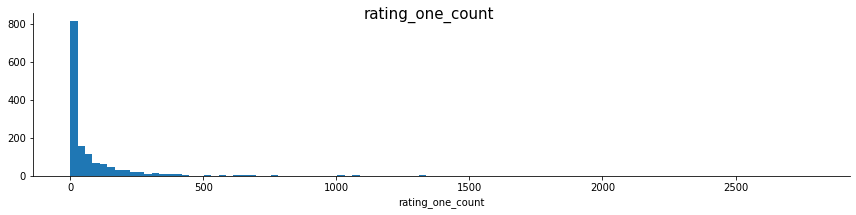

------------------------------------------------------------------------------------------------------------------------



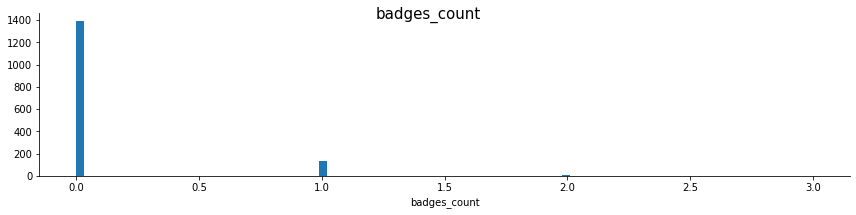

------------------------------------------------------------------------------------------------------------------------



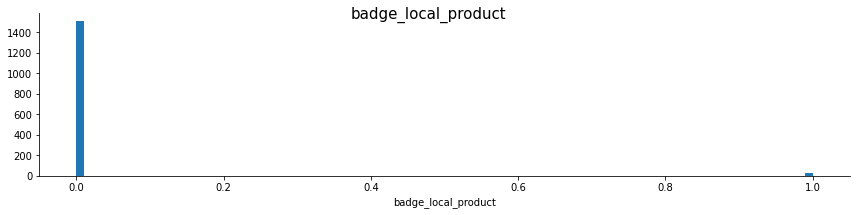

------------------------------------------------------------------------------------------------------------------------



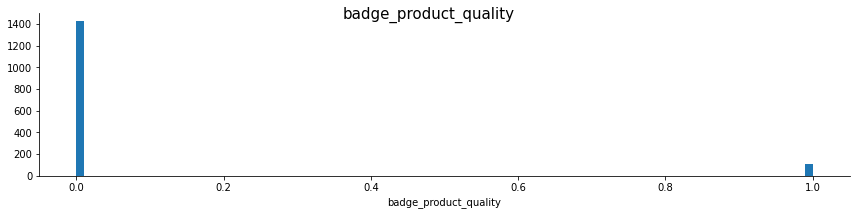

------------------------------------------------------------------------------------------------------------------------



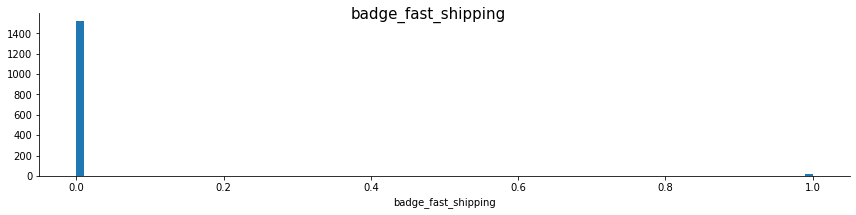

------------------------------------------------------------------------------------------------------------------------



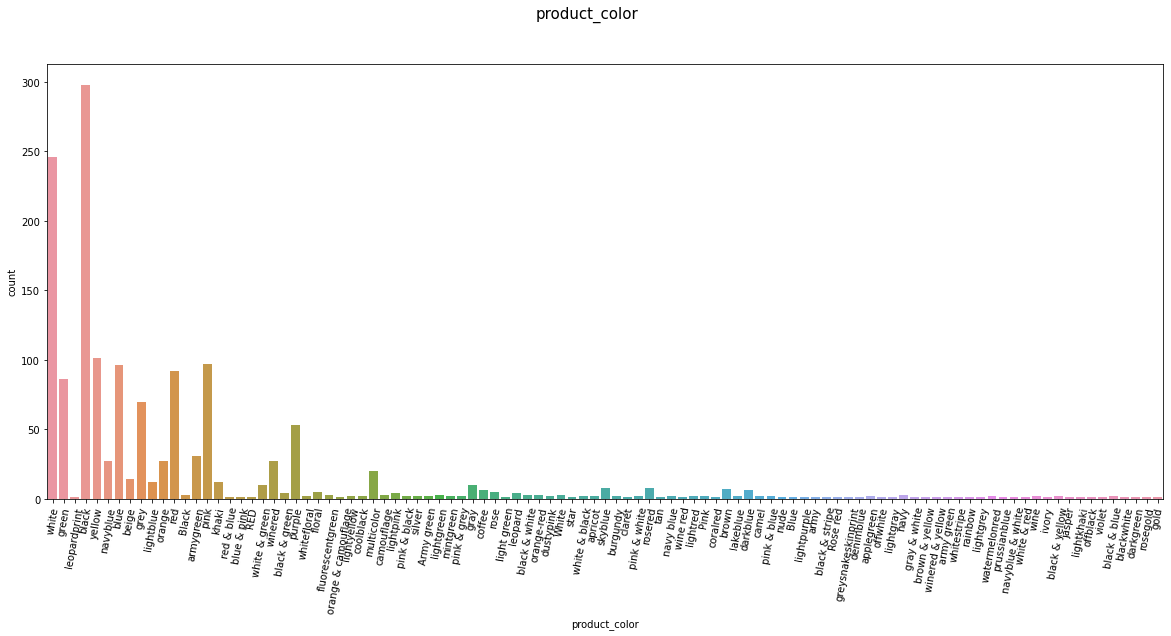

------------------------------------------------------------------------------------------------------------------------



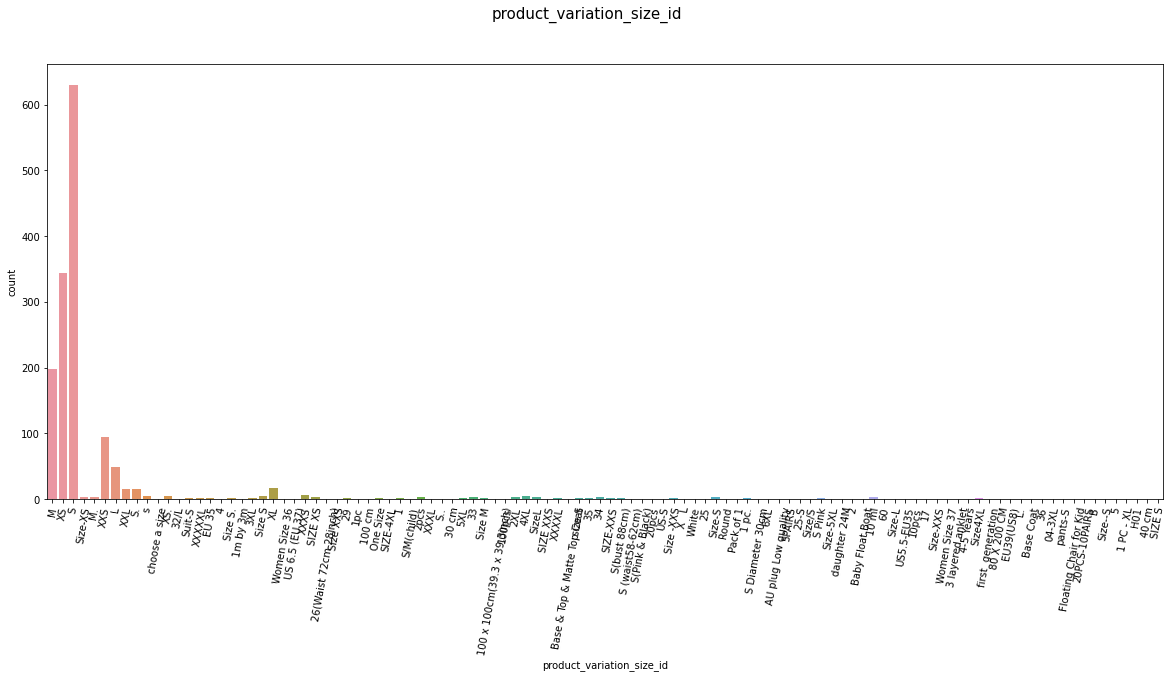

------------------------------------------------------------------------------------------------------------------------



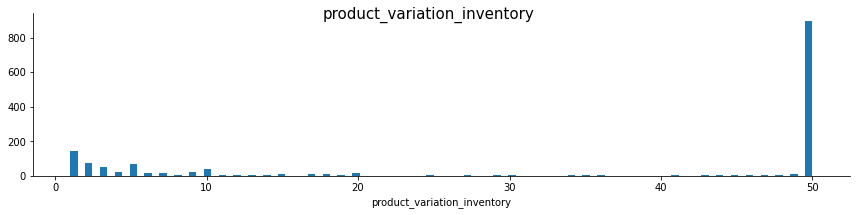

------------------------------------------------------------------------------------------------------------------------



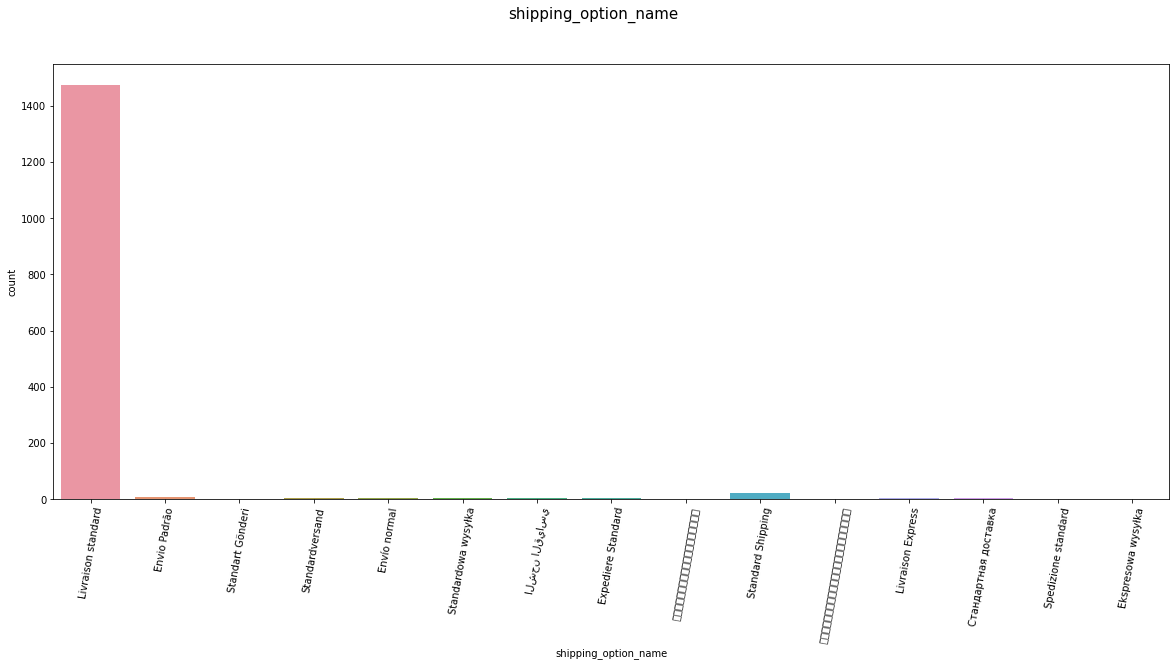

------------------------------------------------------------------------------------------------------------------------



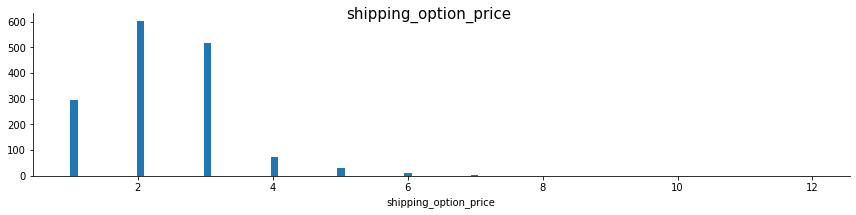

------------------------------------------------------------------------------------------------------------------------



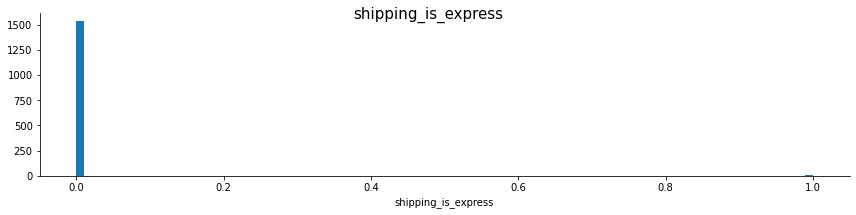

------------------------------------------------------------------------------------------------------------------------



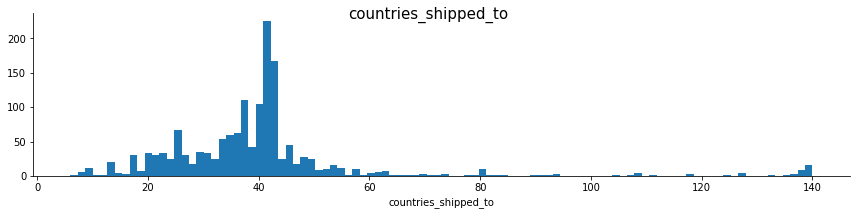

------------------------------------------------------------------------------------------------------------------------



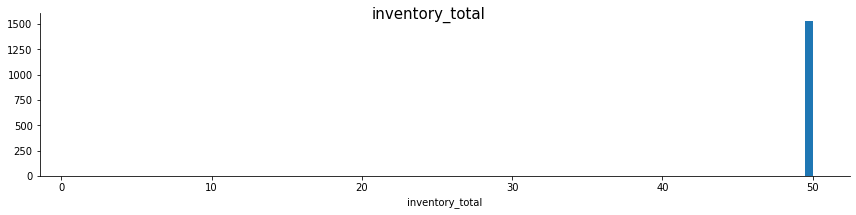

------------------------------------------------------------------------------------------------------------------------



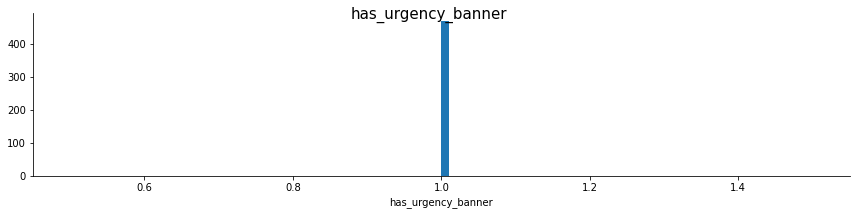

------------------------------------------------------------------------------------------------------------------------



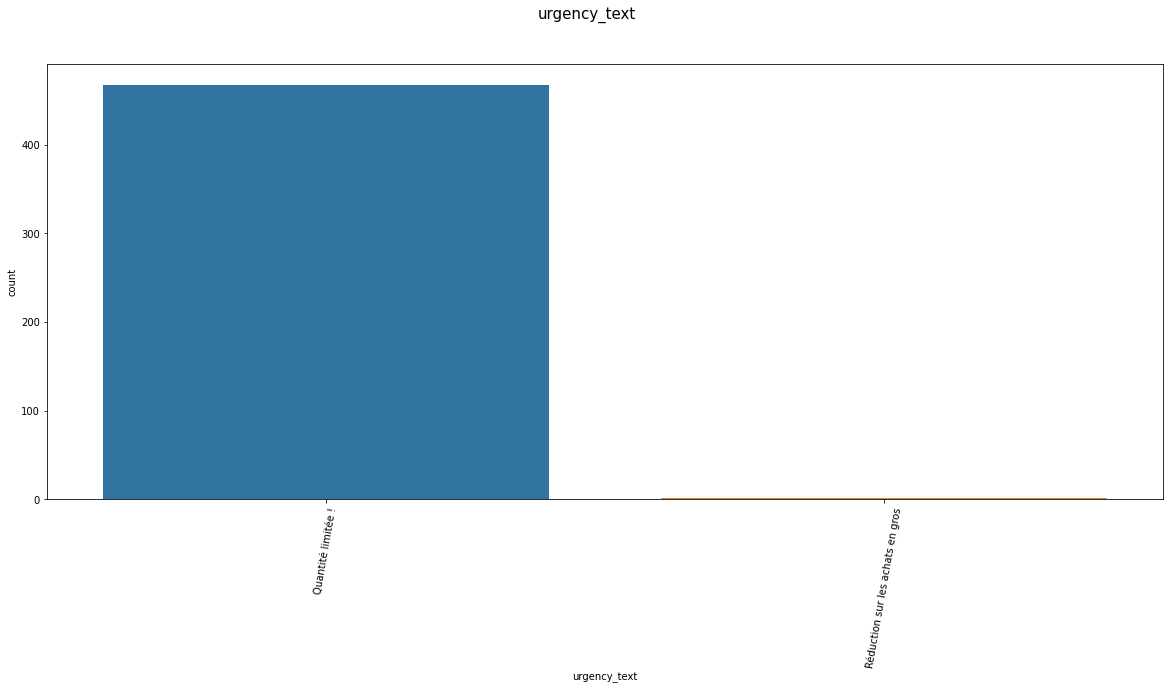

------------------------------------------------------------------------------------------------------------------------



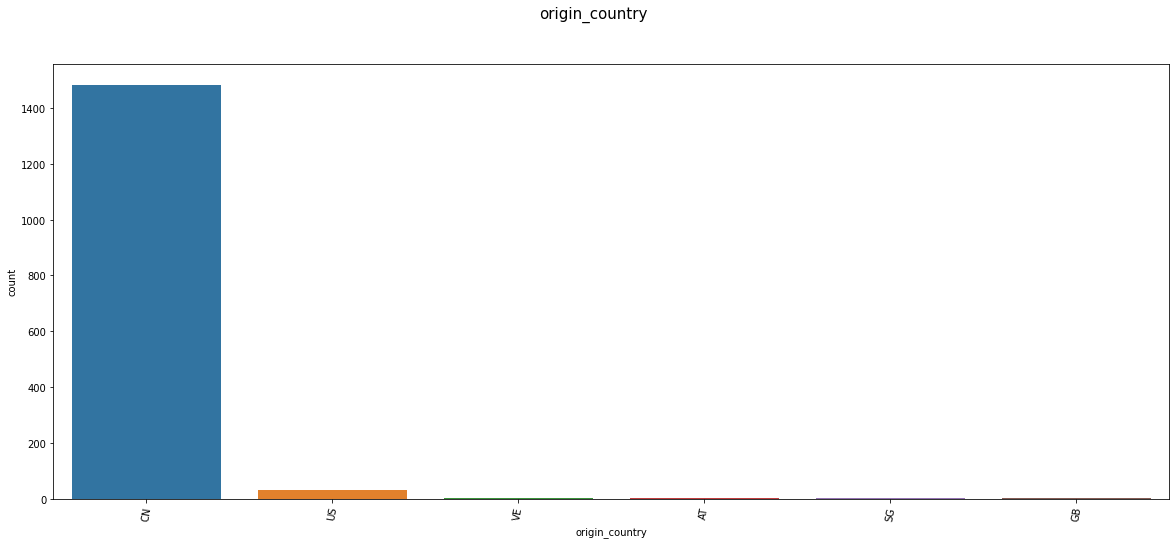

------------------------------------------------------------------------------------------------------------------------



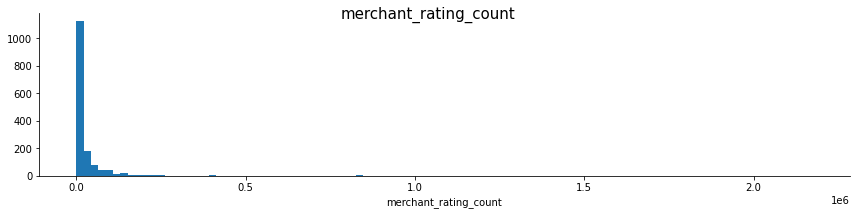

------------------------------------------------------------------------------------------------------------------------



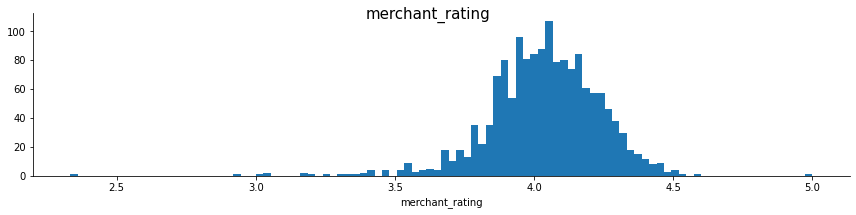

------------------------------------------------------------------------------------------------------------------------



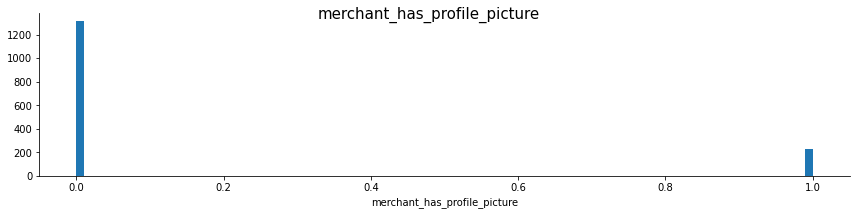

------------------------------------------------------------------------------------------------------------------------



In [14]:
columns_to_exclude = ['title', 'title_orig', 'currency_buyer', 'tags', 'merchant_title', 'merchant_name', 
                'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url', 
                'product_picture', 'product_id', 'theme', 'crawl_month' ]

for col in df.columns:
  count_hist(df,col,columns_to_exclude)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1539.0,8.356452,3.937161,1.000000,5.825000,8.00000,11.00000,49.0
retail_price,1539.0,23.317089,30.309642,1.000000,7.000000,10.00000,26.00000,252.0
units_sold,1539.0,4422.480182,9438.316389,1.000000,100.000000,1000.00000,5000.00000,100000.0
uses_ad_boosts,1539.0,0.435997,0.496048,0.000000,0.000000,0.00000,1.00000,1.0
rating,1539.0,3.822840,0.508619,1.000000,3.550000,3.85000,4.11000,5.0
rating_count,1539.0,907.372320,2001.720315,0.000000,26.000000,161.00000,873.00000,20744.0
rating_five_count,1496.0,450.738636,988.686287,0.000000,13.000000,84.00000,431.00000,11548.0
rating_four_count,1496.0,183.036096,403.989857,0.000000,5.000000,33.00000,171.00000,4152.0
rating_three_count,1496.0,137.152406,314.441561,0.000000,4.000000,26.00000,134.00000,3658.0
rating_two_count,1496.0,64.948529,152.701473,0.000000,2.000000,12.00000,64.00000,2003.0


**Price, Retail Price**

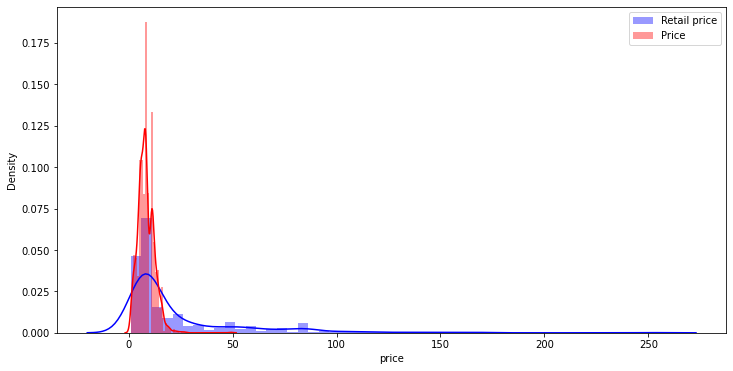

In [16]:
# Price, Retail price 분포 확인 
plt.figure(figsize=(12,6))
sns.distplot(df['retail_price'], color='blue', label='Retail price')
sns.distplot(df['price'], color='red', label='Price')
plt.legend();

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(x=df['retail_price'], name='Retail Price'))
fig.add_trace((go.Box(x=df['price'], name='Price')))
fig['layout']['title'] = 'Distribution of Price and Retail Price'
fig.show()

**units_sold : 판매량**

In [18]:
print('단위 판매량 Median : ',df['units_sold'].median())
print('단위 판매량 Mean : ',df['units_sold'].mean())
df['units_sold'].value_counts()

단위 판매량 Median :  1000.0
단위 판매량 Mean :  4422.480181936322


100       493
1000      403
5000      216
10000     176
20000     103
50         68
10         44
50000      17
100000      6
1           3
8           3
7           2
2           2
3           2
6           1
Name: units_sold, dtype: int64

In [19]:
# 10미만 값은 10으로 올림
def below_ten(units_sold):
    if units_sold < 10:
        return 10
    else:
        return units_sold

In [20]:
df['units_sold'] = df['units_sold'].apply(below_ten)

In [21]:
df['units_sold'].value_counts()

100       493
1000      403
5000      216
10000     176
20000     103
50         68
10         57
50000      17
100000      6
Name: units_sold, dtype: int64

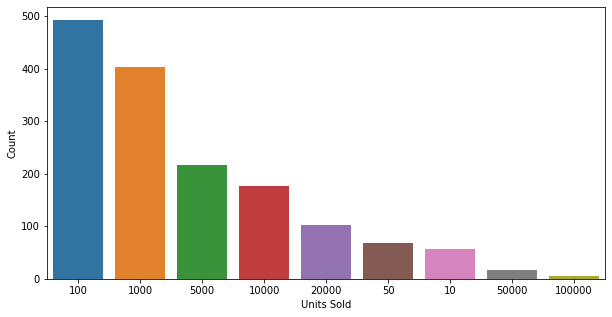

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot('units_sold',
              data = df,
              order = df['units_sold'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()

In [23]:
# 판매량을 기준으로 인기 상품 시각화
def is_successful(units_sold):
    if units_sold > 1000:
        return 'Success'
    else:
        return 'Almost Success'

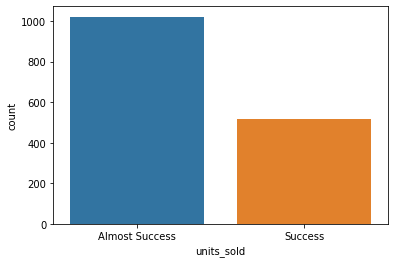

In [24]:
sns.countplot(df['units_sold'].apply(is_successful))
plt.show()

### 2. 클러스터링 - 상품 군집화 / 상관관계 분석

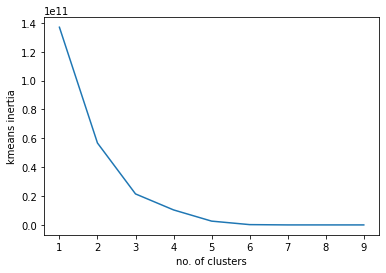

In [25]:
# Elbow Method

from sklearn.cluster import KMeans

clusters = {}
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(df[['units_sold']])  # 판매량 기준으로 상품 군집화 진행
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()));
plt.xlabel('no. of clusters');
plt.ylabel('kmeans inertia');   

> n은 3정도로 보면 될 것 같음

In [26]:
#order cluster method

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index() # cluster_field_name 별 target_field_name의 평균값 출력
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [27]:
df['units_sold_cluster'] = KMeans(n_clusters=3).fit(df[['units_sold']]).predict(df[['units_sold']]) # 판매량을 기준으로 군집화한 컬럼 추가
df = order_cluster('units_sold_cluster','units_sold',df,True)
df.groupby(['units_sold_cluster'])['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
units_sold_cluster,,,,,,,,
0,1237.0,1241.932094,1776.364666,10.0,100.0,1000.0,1000.0,5000.0
1,279.0,13691.756272,4834.487556,10000.0,10000.0,10000.0,20000.0,20000.0
2,23.0,63043.478261,22448.887927,50000.0,50000.0,50000.0,75000.0,100000.0


In [28]:
# 변수 간 상관관계 확인
features= ['price','retail_price','units_sold','rating','rating_count','shipping_option_price','product_variation_inventory','merchant_rating','merchant_rating_count']
corr = df[features].corr(method='spearman')

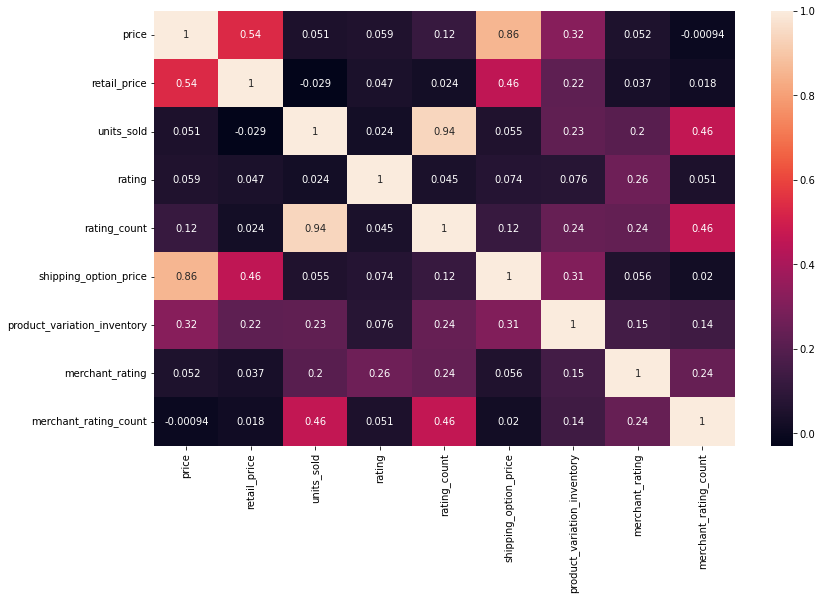

In [31]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True)
plt.show()

In [35]:
# 군집별 시각화
# 군집별 평점 시각화
plt.figure(figsize=(10,8))
px.scatter(df,x='units_sold',y='rating', color='units_sold_cluster', marginal_y ='box',title='Rating vs units sold')


<Figure size 720x576 with 0 Axes>

In [38]:
plt.figure(figsize=(10,8))
px.scatter(df,x='rating',y='merchant_rating', color='units_sold_cluster', marginal_y ='box',title='Merchant Rating vs units sold', opacity=0.7)

<Figure size 720x576 with 0 Axes>

In [39]:
plt.figure(figsize=(10,8))
px.scatter(df,x='retail_price', y='price',color='units_sold_cluster',marginal_y='box')

<Figure size 720x576 with 0 Axes>

In [44]:
# 할인률 컬럼 생성
df['difference'] = df['retail_price'] - df['price']
df['discount'] = df['difference']/df['retail_price'] *100

In [48]:
px.scatter(df,x='discount', y='rating_count', color='units_sold_cluster')

### 3. 판매량 예측 모델

#### 1) 데이터 정제

In [52]:
salesData = df.drop(['units_sold_cluster','crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id', 'currency_buyer'], axis = 1)

salesData = salesData.drop(['theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle'], axis = 1)
salesData = salesData.drop(['title','title_orig','tags'], axis = 1)
salesData = salesData.drop(['shipping_option_name'], axis = 1)
salesData = salesData.drop(['rating_count'], axis = 1)

In [54]:
salesData.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,difference,discount
0,16.00,14,100,0,3.76,26.0,8.0,10.0,1.0,9.0,...,0,34,50,1.0,CN,568,4.128521,0,-2.00,-14.285714
1,8.00,43,100,0,3.57,5.0,4.0,2.0,0.0,3.0,...,0,36,50,1.0,CN,295,3.989831,0,35.00,81.395349
2,8.00,8,5000,1,4.03,295.0,119.0,87.0,42.0,36.0,...,0,41,50,NaN,CN,23832,4.020435,0,0.00,0.000000
3,2.72,3,100,1,3.10,6.0,4.0,2.0,2.0,6.0,...,0,35,50,1.0,CN,14482,4.001588,0,0.28,9.333333
4,3.92,9,10,0,5.00,1.0,0.0,0.0,0.0,0.0,...,0,40,50,NaN,CN,65,3.507692,0,5.08,56.444444


In [55]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1539 non-null   float64
 1   retail_price                  1539 non-null   int64  
 2   units_sold                    1539 non-null   int64  
 3   uses_ad_boosts                1539 non-null   int64  
 4   rating                        1539 non-null   float64
 5   rating_five_count             1496 non-null   float64
 6   rating_four_count             1496 non-null   float64
 7   rating_three_count            1496 non-null   float64
 8   rating_two_count              1496 non-null   float64
 9   rating_one_count              1496 non-null   float64
 10  badges_count                  1539 non-null   int64  
 11  badge_local_product           1539 non-null   int64  
 12  badge_product_quality         1539 non-null   int64  
 13  bad

In [56]:
# 범주형 데이터 
cat_feat = salesData.select_dtypes('object','category').columns.values
salesData_cat = salesData[cat_feat].copy()
print(salesData_cat.nunique().sort_values())

origin_country                 6
product_color                101
product_variation_size_id    106
dtype: int64


In [57]:
# 범주형 데이터 인코딩
salesData_cat_dummies = pd.get_dummies(salesData_cat)
salesData_cat_dummies.head(3)

,product_color_Army green,product_color_Black,product_color_Blue,product_color_Pink,product_color_RED,product_color_Rose red,product_color_White,product_color_applegreen,product_color_apricot,product_color_army,...,product_variation_size_id_first generation,product_variation_size_id_pants-S,product_variation_size_id_s,product_variation_size_id_size S,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
# 숫자 데이터
num_feat = salesData.select_dtypes('number').columns.values
salesData_num = salesData[num_feat].copy()
print(salesData_num.nunique().sort_values())

has_urgency_banner                1
badge_product_quality             2
uses_ad_boosts                    2
merchant_has_profile_picture      2
shipping_is_express               2
badge_local_product               2
badge_fast_shipping               2
badges_count                      4
shipping_option_price             8
units_sold                        9
inventory_total                  10
product_variation_inventory      48
countries_shipped_to             94
retail_price                    104
price                           127
rating                          192
rating_two_count                262
difference                      282
rating_one_count                330
rating_three_count              384
rating_four_count               440
discount                        452
rating_five_count               605
merchant_rating_count           917
merchant_rating                 952
dtype: int64


> 타겟 데이터(units_sold)와 값이 하나인 데이터(has_urgency_banner) 삭제

In [60]:
salesData_num.drop(['units_sold','has_urgency_banner'], axis=1, inplace=True)

In [61]:
# 숫자형 데이터 결측치 처리
salesData_num.isna().sum()

price                            0
retail_price                     0
uses_ad_boosts                   0
rating                           0
rating_five_count               43
rating_four_count               43
rating_three_count              43
rating_two_count                43
rating_one_count                43
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
difference                       0
discount                         0
dtype: int64

In [62]:
salesData_num.fillna(0, inplace=True)

In [63]:
# 상관성이 높은 데이터 삭제
from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

num_feat = salesData_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(salesData_num[comb[0]], salesData_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [64]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['retail_price', 'difference'],
       ['rating_five_count', 'rating_four_count'],
       ['rating_five_count', 'rating_three_count'],
       ['rating_four_count', 'rating_three_count'],
       ['rating_four_count', 'rating_two_count'],
       ['rating_three_count', 'rating_two_count'],
       ['rating_three_count', 'rating_one_count'],
       ['rating_two_count', 'rating_one_count']], dtype='<U28')

In [65]:
salesData_num = salesData_num.drop(['difference','rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count'], axis=1, errors='ignore')

In [66]:
salesData_num.head()

,price,retail_price,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,discount
0,16.00,14,0,3.76,0,0,0,0,50,4,0,34,50,568,4.128521,0,-14.285714
1,8.00,43,0,3.57,0,0,0,0,1,3,0,36,50,295,3.989831,0,81.395349
2,8.00,8,1,4.03,0,0,0,0,50,2,0,41,50,23832,4.020435,0,0.000000
3,2.72,3,1,3.10,0,0,0,0,1,1,0,35,50,14482,4.001588,0,9.333333
4,3.92,9,0,5.00,0,0,0,0,1,1,0,40,50,65,3.507692,0,56.444444


#### 2) 데이터 분리

In [67]:
data = pd.concat([salesData['units_sold'], salesData_num, salesData_cat_dummies], axis=1)
data.head()

,units_sold,price,retail_price,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,product_variation_size_id_first generation,product_variation_size_id_pants-S,product_variation_size_id_s,product_variation_size_id_size S,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,100,16.00,14,0,3.76,0,0,0,0,50,...,0,0,0,0,0,1,0,0,0,0
1,100,8.00,43,0,3.57,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,5000,8.00,8,1,4.03,0,0,0,0,50,...,0,0,0,0,0,1,0,0,0,0
3,100,2.72,3,1,3.10,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,10,3.92,9,0,5.00,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split

X = data.drop(['units_sold'], axis = 1)
y = data['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2022)

#### 3) 모델링

**DecisionTreeClassifier**

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

classifier_DTC = DecisionTreeClassifier(random_state = 2022)
classifier_DTC.fit(X_train, y_train)

y_pred_DTC = classifier_DTC.predict(X_test)
accuracy_score(y_test, y_pred_DTC)

0.4134199134199134


**SVC**



In [70]:
from sklearn.svm import SVC

classifier_SVC = SVC(random_state = 2022)
classifier_SVC.fit(X_train, y_train)

y_pred_SVC = classifier_SVC.predict(X_test)
accuracy_score(y_test, y_pred_SVC)

0.3398268398268398

**RandomForestClassifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier

classifier_RFC = RandomForestClassifier(random_state = 2022)
classifier_RFC.fit(X_train, y_train)

y_pred_RFC = classifier_RFC.predict(X_test)
accuracy_score(y_test, y_pred_RFC)

0.4653679653679654

**AdaBoost - Random Forest**

In [72]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(random_state = 2022),
                                       learning_rate = 0.01,
                                       random_state = 2022) 
classifier_ABC_RF.fit(X_train, y_train)

y_pred_ABC_RF = classifier_ABC_RF.predict(X_test)
accuracy_score(y_test, y_pred_ABC_RF)

0.4675324675324675

**GradientBoostingClassifier**

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = 2022)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.4264069264069264

**KNeighborsClassifier**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.3116883116883117

**XGBClassifier**

In [75]:
from xgboost import XGBClassifier

classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

y_pred_XGB = classifier_XGB.predict(X_test)
accuracy_score(y_test, y_pred_XGB)

0.4134199134199134

In [76]:
from sklearn.model_selection import cross_val_score

classifiers = [classifier_DTC, 
               classifier_SVC,
               classifier_RFC, 
               classifier_ABC_RF, 
               classifier_GBC, 
               classifier_KNN, 
               classifier_XGB]
classifiers_names = ['Decision Tree',
                     'SVC', 
                     'Random Forest',
                     'AdaBoost - Random Forest',
                     'Gradient Boosting',
                     'KNeighborsClassifier',
                     'XG Boost']
accuracy_mean = []

for cl in classifiers :
    accuracies = cross_val_score(estimator = cl, 
                                 X = X_train, 
                                 y = y_train, 
                                 cv = 4)
    accuracy_mean.append(accuracies.mean()*100)

    
accuracy_df = pd.DataFrame({'Classifier': classifiers_names,
                           'Accuracy Mean': accuracy_mean})
accuracy_df.sort_values('Accuracy Mean',ascending=False)

,Classifier,Accuracy Mean
3,AdaBoost - Random Forest,41.683189
2,Random Forest,40.383795
4,Gradient Boosting,39.552871
6,XG Boost,38.809376
0,Decision Tree,37.510326
1,SVC,33.703359
5,KNeighborsClassifier,31.289412


**GridSearchCV**

In [77]:
from sklearn.model_selection import GridSearchCV

gb_params = [{'loss': ['deviance', 'exponential'], 
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 250, 500]}]

grid_search_GBC = GridSearchCV(estimator = classifier_GBC,
                               param_grid = gb_params,
                               scoring = 'accuracy',
                               cv = 4,
                               n_jobs = -1)

grid_search_GBC.fit(X_train, y_train)
best_accuracy_GBC = grid_search_GBC.best_score_
best_parameters_GBC = grid_search_GBC.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_GBC*100))
print("Best Parameters:", best_parameters_GBC)

Best Accuracy: 41.04 %
Best Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 500}


In [78]:
optimised_GBC = GradientBoostingClassifier(random_state = 2022,
                                       loss = 'deviance',
                                       learning_rate = 0.1,
                                       n_estimators = 500)
optimised_GBC.fit(X_train, y_train)
y_pred_GBC = optimised_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.46320346320346323